In [ ]:
import pandas as pd

# Считываем датасет, очищенный от нулевых значений и самых больших выбросов
data_ML = pd.read_csv('https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data_new.csv')
data_ML.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius1,20.570000,19.690000,20.290000,12.450000,18.250000
texture1,17.770000,21.250000,14.340000,15.700000,19.980000
perimeter1,132.900000,130.000000,135.100000,82.570000,119.600000
area1,1326.000000,1203.000000,1297.000000,477.100000,1040.000000
smoothness1,0.084740,0.109600,0.100300,0.127800,0.094630
compactness1,0.078640,0.159900,0.132800,0.170000,0.109000
concavity1,0.086900,0.197400,0.198000,0.157800,0.112700
concave_points1,0.070170,0.127900,0.104300,0.080890,0.074000
symmetry1,0.181200,0.206900,0.180900,0.208700,0.179400


Посмотрим информацию о датафрейме

In [ ]:
data_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   diagnosis           518 non-null    int64  
 1   radius1             518 non-null    float64
 2   texture1            518 non-null    float64
 3   perimeter1          518 non-null    float64
 4   area1               518 non-null    float64
 5   smoothness1         518 non-null    float64
 6   compactness1        518 non-null    float64
 7   concavity1          518 non-null    float64
 8   concave_points1     518 non-null    float64
 9   symmetry1           518 non-null    float64
 10  fractal_dimension1  518 non-null    float64
 11  radius2             518 non-null    float64
 12  texture2            518 non-null    float64
 13  perimeter2          518 non-null    float64
 14  area2               518 non-null    float64
 15  smoothness2         518 non-null    float64
 16  compactn

В нашем датафрейме 518 строк, 31 столбец

Подготовим данные и импортируем необходимые библиотеки для обучения модели логистической регресси

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split   # Библиотека для машинного обучения, импорт функции разделения данных на тестовые и обучающие выборки
from sklearn.preprocessing import StandardScaler       # Библиотека для машинного обучения, импорт класса для стандартизации данных
from sklearn.linear_model import LogisticRegression    # Библиотека линейных моделей, импорт модели логистической регрессии
from sklearn.metrics import (                          # Библиотека для получения необходимых метрик, их импорт
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем признаки и таргет
X = data_ML.drop('diagnosis', axis=1)  # X - все признаки датасета, за исключением таргетного признака diagnosis
y = data_ML['diagnosis'] # Y - таргетный признак diagnosis

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применяем логирование и стандартизацию
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


Обучение модели с L1-регуляризацией, получение метрик

In [ ]:
# Параметры для модели с L1-регуляризацией
model = LogisticRegression(penalty='l1', solver='liblinear')  # Используем liblinear, чтобы поддерживать L1 - регуляризацию

# Обучаем модель
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Вычисление метрик
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC Score': roc_auc_score(y_test, y_proba),
    'Average Precision Score': average_precision_score(y_test, y_proba)
}

# Вычисляем специфичность
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
metrics['Specificity'] = specificity

# Выводим метрики
for name, value in metrics.items():
    print(f'{name}: {value:.4f}')

Accuracy: 0.9519
Balanced Accuracy: 0.9375
Recall: 0.8750
Precision: 1.0000
F1 Score: 0.9333
ROC AUC Score: 0.9984
Average Precision Score: 0.9975
Specificity: 1.0000


**Модель логистической регрессии с L1 - регуляризацией без подбора гиперпараметров показала очень хорошие результаты**:  


*   Метрики precision и specificity 1,0, то есть модель правильно классифицировала всех больных, являющихся действительно больными, и всех здоровых, являющихся действительно здоровыми
*   Метрики ROC AUC score и average precision score более 0.99

*   Хорошие значения метрик accuracy и balanced accuracy (0.95 и 0.94 соответственно)
*   Наименьшее значение у метрики recall - 0.88. Попробуем ее улучшить с помощью подбора гиперпараметров





Визуализация полученных метрик

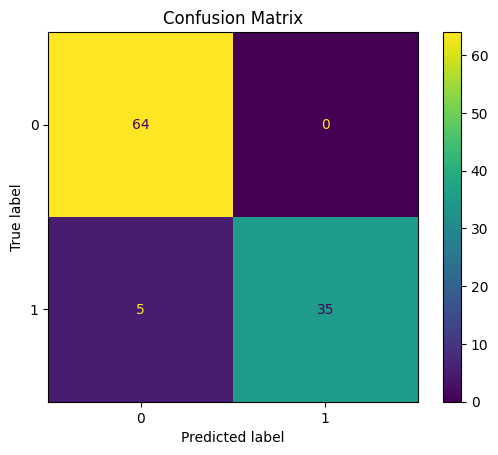

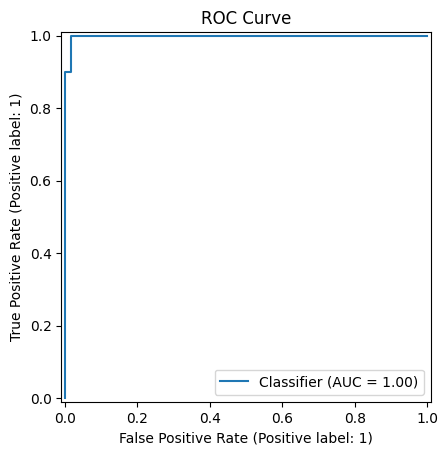

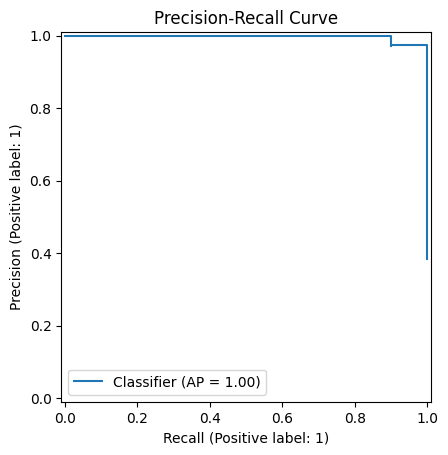

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('ROC Curve')
plt.show()

# PR Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title('Precision-Recall Curve')
plt.show()

1.   Конфузионная матрица:  
*   FP = 0 - все объекты положительного класса действительно являются больными
*   FN = 5 - в 5% случаев модель ошибочно отнесла к негативному классу (здоровые) больных


2.  AUC = 1.0, AP = 1.0 - это наилучшие результаты






Оптимизация гиперпараметров с помощью библиотеки optuna

In [ ]:
# Импорт библиотеки optuna для подбора гиперпараметров
!pip install optuna
import optuna

# Функция для оценки производительности модели с определенными гиперпараметрами
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3) # Оптимизация гиперпараметра С
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear') # Создание и обучение модели
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Предсказание классов
    return f1_score(y_test, y_pred) # Возвращаем метрику f1 score

# Создаем объект study, который будет управлять процессом оптимизации
study = optuna.create_study(direction='maximize') # direction='maximize - максимизация F1-меры
study.optimize(objective, n_trials=100)

# Оптимальные гиперпараметры
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2024-11-15 19:35:02,225] A new study created in memory with name: no-name-430d3c8c-57eb-453f-87fa-7055ea9fa5df
<ipython-input-15-c5021a72ad36>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-15 19:35:02,278] Trial 0 finished with value: 0.9367088607594937 and parameters: {'C': 0.03313741307584211}. Best is trial 0 with value: 0.9367088607594937.
<ipython-input-15-c5021a72ad36>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-15 19:35:02,316] Trial 1 finished with value: 0.0 and parameters: {'C': 0.0034159005545080093}. Best is trial 0 with value: 0.9367088

Best hyperparameters: {'C': 0.08183588701716574}


Самый оптимальный гиперпараметр: С = 0.0818

In [ ]:
# Обучение с оптимизированными гиперпараметрами
optimized_model = LogisticRegression(**best_params, penalty='l1', solver='liblinear')
optimized_model.fit(X_train, y_train)

# Прогнозирование
y_pred_optimized = optimized_model.predict(X_test)
y_proba_optimized = optimized_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
optimized_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_optimized),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred_optimized),
    'Recall': recall_score(y_test, y_pred_optimized),
    'Precision': precision_score(y_test, y_pred_optimized),
    'F1 Score': f1_score(y_test, y_pred_optimized),
    'ROC AUC Score': roc_auc_score(y_test, y_proba_optimized),
    'Average Precision Score': average_precision_score(y_test, y_proba_optimized)
}

# Вычисляем специфичность
tn_optimized, fp_optimized, fn_optimized, tp_optimized = confusion_matrix(y_test, y_pred_optimized).ravel()
specificity_optimized = tn_optimized / (tn_optimized + fp_optimized)

optimized_metrics['Specificity'] = specificity_optimized

# Выводим оптимизированные метрики
for name, value in optimized_metrics.items():
    print(f'{name}: {value:.4f}')

Accuracy: 0.9712
Balanced Accuracy: 0.9625
Recall: 0.9250
Precision: 1.0000
F1 Score: 0.9610
ROC AUC Score: 0.9875
Average Precision Score: 0.9881
Specificity: 1.0000


**С помощью гиперпараметров удалось улучшить метрики:**   


*   accuracy (0.97), balanced accuracy (0.96), recall (0.92), f1 score (0.96)
*   метрики precision и specifity по-прежнему имеют наилучшее значение 1.0  
*   несколько меньше, но тоже отличные значения у метрик ROC AUC score (0.988) average precision score (0.988)





Обучаем модель логистической регрессии с подобранными гиперпараметрами

In [ ]:
# Обучение с оптимизированными гиперпараметрами
optimized_model = LogisticRegression(**best_params, solver='liblinear')
optimized_model.fit(X_train, y_train)

# Прогнозирование
y_pred_optimized = optimized_model.predict(X_test)
y_proba_optimized = optimized_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
optimized_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_optimized),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred_optimized),
    'Recall': recall_score(y_test, y_pred_optimized),
    'Precision': precision_score(y_test, y_pred_optimized),
    'F1 Score': f1_score(y_test, y_pred_optimized),
    'ROC AUC Score': roc_auc_score(y_test, y_proba_optimized),
    'Average Precision Score': average_precision_score(y_test, y_proba_optimized)
}

# Вычисляем специфичность
tn_optimized, fp_optimized, fn_optimized, tp_optimized = confusion_matrix(y_test, y_pred_optimized).ravel()
specificity_optimized = tn_optimized / (tn_optimized + fp_optimized)

optimized_metrics['Specificity'] = specificity_optimized

# Выводим оптимизированные метрики
for name, value in optimized_metrics.items():
    print(f'{name}: {value:.4f}')

Accuracy: 0.9808
Balanced Accuracy: 0.9750
Recall: 0.9500
Precision: 1.0000
F1 Score: 0.9744
ROC AUC Score: 0.9996
Average Precision Score: 0.9994
Specificity: 1.0000


**Нам удалось еще больше улучшить метрики**  


*   accuracy 0.98  recall (0.92)
*   balanced accuracy 0.975  
*   recall 0.95
*   f1 score 0.96
*   ROC AUC score, average precision score более 0.99
*   Precision и специфичность остаются наилучшими - 1.0







Выведем 10 наиболее важных признаков, визуализируем лучшие метрики и признаки

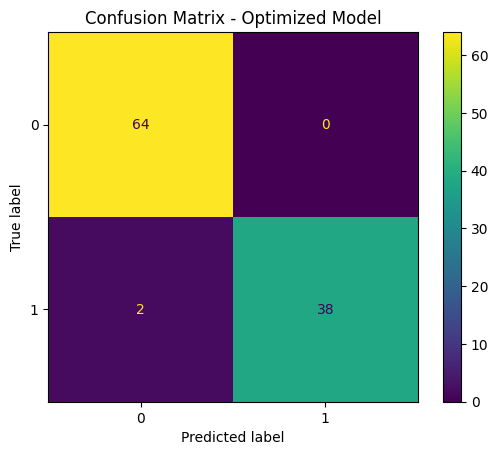

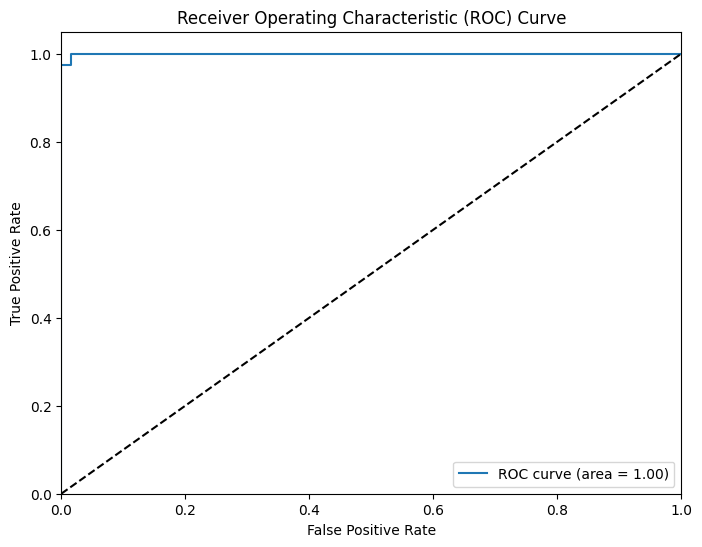

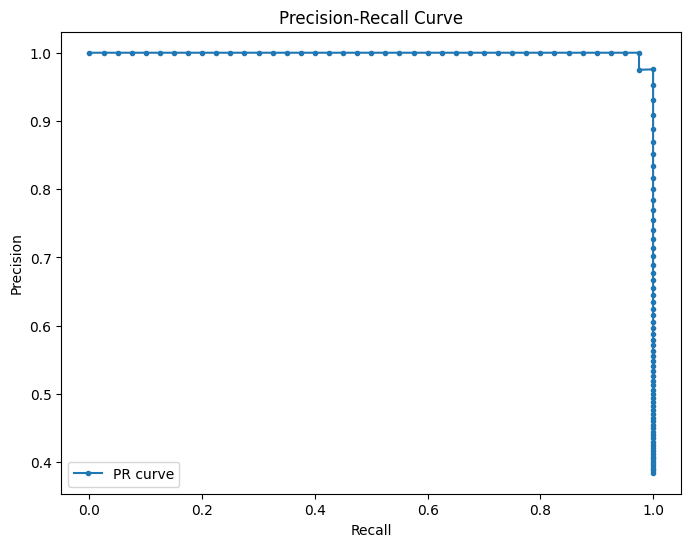

Top 10 important features:
radius3: 0.4563
concavity1: 0.4308
fractal_dimension1: 0.4082
concavity3: 0.3975
perimeter3: 0.3943
area3: 0.3918
compactness1: 0.3869
fractal_dimension2: 0.3851
perimeter2: 0.3769
compactness3: 0.3376


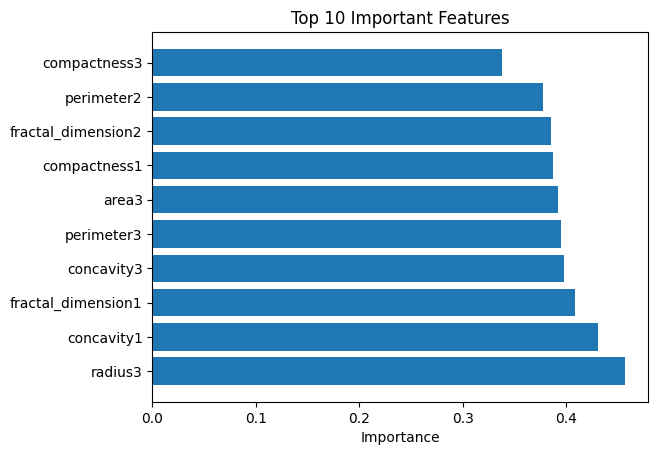

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Матрица ошибок для оптимизированной модели
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_optimized).plot()
plt.title('Confusion Matrix - Optimized Model')
plt.show()

# ROC-кривая
y_scores = optimized_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# PR-кривая
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Важность признаков
importance = np.abs(optimized_model.coef_[0])
feature_names = data_ML.columns[:-1]
importance_dict = dict(zip(feature_names, importance))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Выводим 10 наиболее важных признаков
top_10_features = sorted_importance[:10]
print("Top 10 important features:")
for feature, importance in top_10_features:
    print(f'{feature}: {importance:.4f}')

# Визуализируем 10 наиболее важных признаков
plt.barh([x[0] for x in top_10_features], [x[1] for x in top_10_features])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

**Наиболее важные признаки:**  
    'radius3',
    'concavity1',
    'fractal_dimension1',
    'concavity3',
    'perimeter3',
    'area3',
    'compactness1',
    'fractal_dimension2',
    'perimeter2',
    'compactness3'  
**Визуализация метрик:**  

**Конфузионная матрица**
*   Удалось снизить TN до 2%
*   TP повысилось с 35 до 38%  
*   TN = 64% и FP = 0% - без изменений  

AUC и AP максимальны и равны 1.0





In [ ]:
# Выбираем 10 наиболее важных признаков и таргет
selected_features = [
    'diagnosis',
    'radius3',
    'concavity1',
    'fractal_dimension1',
    'concavity3',
    'perimeter3',
    'area3',
    'compactness1',
    'fractal_dimension2',
    'perimeter2',
    'compactness3'
]

# Фильтруем DataFrame, оставляя только выбранные признаки
data_ML10 = data_ML[selected_features]

# Отобразим результат
print(data_ML10.head().T)

                              0            1            2           3  \
diagnosis              1.000000     1.000000     1.000000    1.000000   
radius3               24.990000    23.570000    22.540000   15.470000   
concavity1             0.086900     0.197400     0.198000    0.157800   
fractal_dimension1     0.056670     0.059990     0.058830    0.076130   
concavity3             0.241600     0.450400     0.400000    0.535500   
perimeter3           158.800000   152.500000   152.200000  103.400000   
area3               1956.000000  1709.000000  1575.000000  741.600000   
compactness1           0.078640     0.159900     0.132800    0.170000   
fractal_dimension2     0.003532     0.004571     0.005115    0.005082   
perimeter2             3.398000     4.585000     5.438000    2.217000   
compactness3           0.186600     0.424500     0.205000    0.524900   

                              4  
diagnosis              1.000000  
radius3               22.880000  
concavity1           

Определяем признаки и таргет в отфильтрованном по 10 наиболее важным признакам датафрейме, делим выборки на тестовую и тренировочную, логируем и стандартизируем данные

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_ML10.drop('diagnosis', axis=1)  # X - все признаки датасета, за исключением таргетного признака diagnosis
y = data_ML10['diagnosis'] # Y - таргетный признак diagnosis

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применяем логирование и стандартизацию
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучаем модели случайного леса, градиентного бустинга, AdaBoost, Voting, Catboost

In [ ]:
# Игнорирование всех предупреждений
import warnings
warnings.filterwarnings("ignore")

# Импортируем модель логистической регрессии
from sklearn.linear_model import LogisticRegression

# Импортируем необходимые библиотеки для обучения моделей RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, XGBClassifier, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
)

# Определяем модели
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    "CatBoost": CatBoostClassifier(silent=True)
}

# Словарь для хранения метрик
metrics = {}

# Обучаем каждую модель и собираем метрики
for model_name, model in models.items():
    # Предсказание на кросс-валидации
    y_pred = cross_val_predict(model, X_train, y_train, cv=5, method='predict')

    # Проверяем, поддерживает ли модель метод predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    else:
        y_pred_proba = y_pred  # Если не поддерживает, подставляем y_pred для roc_auc и pr_auc

    # Получаем метрики
    accuracy = accuracy_score(y_train, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Если predict_proba не поддерживается, roc_auc и pr_auc не будут рассчитываться
    roc_auc = roc_auc_score(y_train, y_pred_proba) if hasattr(model, "predict_proba") else None
    pr_auc = average_precision_score(y_train, y_pred_proba) if hasattr(model, "predict_proba") else None

    # Вычисление специфичности
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Создаем словарь с метриками
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Specificity': specificity
    }

# Обработка VotingClassifier отдельно
voting_model = VotingClassifier(
    estimators=list(models.items()),  # Добавляем все модели
    voting='soft'
)

# Предсказание для VotingClassifier
voting_pred = cross_val_predict(voting_model, X_train, y_train, cv=5, method='predict')
voting_pred_proba = cross_val_predict(voting_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Расчет метрик для VotingClassifier
voting_accuracy = accuracy_score(y_train, voting_pred)
voting_f1 = f1_score(y_train, voting_pred)

if hasattr(voting_model, "predict_proba"):
    voting_roc_auc = roc_auc_score(y_train, voting_pred_proba)
    voting_pr_auc = average_precision_score(y_train, voting_pred_proba)
else:
    voting_roc_auc = None
    voting_pr_auc = None

metrics['Voting'] = {
    'Accuracy': voting_accuracy,
    'Balanced Accuracy': balanced_accuracy_score(y_train, voting_pred),
    'Recall': recall_score(y_train, voting_pred),
    'Precision': precision_score(y_train, voting_pred),
    'F1 Score': voting_f1,
    'ROC AUC': voting_roc_auc,
    'PR AUC': voting_pr_auc,  # Используем расчеты PR AUC здесь
    'Specificity': tn / (tn + fp)  # Используем предсказания Voting для специфичности
}

# Преобразуем в DataFrame для удобства
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# Выбор модели с наилучшей F1 Score
best_model_name = metrics_df['F1 Score'].idxmax()
best_model_metrics = metrics_df.loc[best_model_name]

# Печать результатов
print(f"\nBest model: {best_model_name}")
print(best_model_metrics)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.3 MB/s eta 0:00:00
                  Accuracy  Balanced Accuracy    Recall  Precision  F1 Score  \
Random Forest     0.934783           0.927783  0.906475   0.900000  0.903226   
GradientBoosting  0.934783           0.927783  0.906475   0.900000  0.903226   
XGBoost           0.932367           0.924186  0.899281   0.899281  0.899281   
AdaBoost          0.937198           0.931380  0.913669   0.900709  0.907143   
CatBoost          0.942029           0.935016  0.913669   0.913669  0.913669   
Voting            0.944444           0.938613  0.920863   0.914286  0.917563   

                   ROC AUC    PR AUC  Specificity  
Random Forest     0.976494  0.969900     0.949091  
GradientBoosting  0.964303  0.959848     0.949091  
XGBoost           0.975330  0.962601     0.949091  
AdaBoost          0.970909  0.964192     0.949091  
CatBoost          0.977109  0.973826     0.956364  
Voting            0.976952  0.971517     0.95636

Наилучшая модель - Voting, метрики качества достаточно хорошие - более 91-97%, однако более низкие чем у модели логистической регрессии с гиперпараметрами

Подберем лучшие гиперпараметры для наших моделей с помощью библиотеки optuna

In [ ]:
!pip install optuna
import optuna

# Импортируем необходимые библиотеки для обучения моделей RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, XGBClassifier, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Функция для оценки производительности модели с определенными гиперпараметрами
def objective(trial, model_class):

    # Создаем модели
    if model_class == RandomForestClassifier:
        n_estimators = trial.suggest_int('n_estimators', 10, 100)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)

    elif model_class == GradientBoostingClassifier:
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    elif model_class == XGBClassifier:
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    elif model_class == AdaBoostClassifier:
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1)
        model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

    elif model_class == CatBoostClassifier:
        model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0)
        return model.fit(X_train, y_train).score(X_valid, y_valid)  # Параметры выбираются вне Optuna

    else:
        raise ValueError("Модель не распознана.")

    # Обучение модели
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # Предсказание классов
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy # Возвращаем метрику accuracy_score

# Функция оптимизации модели, в которой создается объект study, управляющий процессом оптимизации
def optimize_model(model_class):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_class), n_trials=50)

    print(f'Наилучшие параметры для {model_class.__name__}: {study.best_params}')
    print(f'Accuracy на тестовой выборке: {study.best_value}')


In [ ]:
# Применяем функцию optimize_model к RandomForestClassifier
optimize_model(RandomForestClassifier)

[I 2024-11-17 09:18:16,658] A new study created in memory with name: no-name-bf895622-87dd-43e3-a67e-7cbc93672f5f
[I 2024-11-17 09:18:16,761] Trial 0 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 23, 'max_depth': 8, 'min_samples_split': 11}. Best is trial 0 with value: 0.9038461538461539.
[I 2024-11-17 09:18:16,832] Trial 1 finished with value: 0.9134615384615384 and parameters: {'n_estimators': 16, 'max_depth': 14, 'min_samples_split': 9}. Best is trial 1 with value: 0.9134615384615384.
[I 2024-11-17 09:18:17,072] Trial 2 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 47, 'max_depth': 13, 'min_samples_split': 20}. Best is trial 1 with value: 0.9134615384615384.
[I 2024-11-17 09:18:17,165] Trial 3 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 30, 'max_depth': 1, 'min_samples_split': 6}. Best is trial 1 with value: 0.9134615384615384.
[I 2024-11-17 09:18:17,549] Trial 4 finished with value: 0.903846153846153

Наилучшие параметры для RandomForestClassifier: {'n_estimators': 13, 'max_depth': 13, 'min_samples_split': 12}
Accuracy на тестовой выборке: 0.9230769230769231


In [ ]:
# Применяем функцию optimize_model к GradientBoostingClassifier
optimize_model(GradientBoostingClassifier)

[I 2024-11-17 09:18:47,927] A new study created in memory with name: no-name-02dc22fe-a7c6-4172-b69d-d96318cc055b
[I 2024-11-17 09:18:48,958] Trial 0 finished with value: 0.9134615384615384 and parameters: {'n_estimators': 152, 'learning_rate': 0.09440253416950692, 'max_depth': 3}. Best is trial 0 with value: 0.9134615384615384.
[I 2024-11-17 09:18:50,081] Trial 1 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 77, 'learning_rate': 0.04084725715645179, 'max_depth': 13}. Best is trial 0 with value: 0.9134615384615384.
[I 2024-11-17 09:18:51,173] Trial 2 finished with value: 0.8942307692307693 and parameters: {'n_estimators': 100, 'learning_rate': 0.008684821135374604, 'max_depth': 19}. Best is trial 0 with value: 0.9134615384615384.
[I 2024-11-17 09:18:51,713] Trial 3 finished with value: 0.8942307692307693 and parameters: {'n_estimators': 86, 'learning_rate': 0.06046085788667888, 'max_depth': 10}. Best is trial 0 with value: 0.9134615384615384.
[I 2024-11-17 09

Наилучшие параметры для GradientBoostingClassifier: {'n_estimators': 192, 'learning_rate': 0.08970703923233031, 'max_depth': 2}
Accuracy на тестовой выборке: 0.9230769230769231


In [ ]:
# Применяем функцию optimize_model к XGBClassifier
optimize_model(XGBClassifier)

[I 2024-11-17 09:19:25,212] A new study created in memory with name: no-name-dba24f36-7cb6-4309-bb8b-c7697df9ee7d
[I 2024-11-17 09:19:25,292] Trial 0 finished with value: 0.6153846153846154 and parameters: {'n_estimators': 61, 'learning_rate': 0.004094938086604807, 'max_depth': 7}. Best is trial 0 with value: 0.6153846153846154.
[I 2024-11-17 09:19:25,330] Trial 1 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 62, 'learning_rate': 0.5171586440875893, 'max_depth': 18}. Best is trial 1 with value: 0.9038461538461539.
[I 2024-11-17 09:19:25,486] Trial 2 finished with value: 0.6153846153846154 and parameters: {'n_estimators': 122, 'learning_rate': 0.0019431712988795848, 'max_depth': 7}. Best is trial 1 with value: 0.9038461538461539.
[I 2024-11-17 09:19:25,550] Trial 3 finished with value: 0.8942307692307693 and parameters: {'n_estimators': 117, 'learning_rate': 0.2631262823117893, 'max_depth': 19}. Best is trial 1 with value: 0.9038461538461539.
[I 2024-11-17 09:

Наилучшие параметры для XGBClassifier: {'n_estimators': 62, 'learning_rate': 0.5171586440875893, 'max_depth': 18}
Accuracy на тестовой выборке: 0.9038461538461539


In [ ]:
# Применяем функцию optimize_model к AdaBoostClassifier
optimize_model(AdaBoostClassifier)

[I 2024-11-17 09:19:55,819] A new study created in memory with name: no-name-755e19db-7782-469c-9c57-d191cbe37d9b
[I 2024-11-17 09:19:56,737] Trial 0 finished with value: 0.875 and parameters: {'n_estimators': 118, 'learning_rate': 0.001243002670586746}. Best is trial 0 with value: 0.875.
[I 2024-11-17 09:19:58,072] Trial 1 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 173, 'learning_rate': 0.0028009283947235952}. Best is trial 1 with value: 0.8846153846153846.
[I 2024-11-17 09:19:59,049] Trial 2 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 104, 'learning_rate': 0.01979555554409867}. Best is trial 2 with value: 0.9038461538461539.
[I 2024-11-17 09:20:00,966] Trial 3 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 162, 'learning_rate': 0.18029494362658988}. Best is trial 2 with value: 0.9038461538461539.
[I 2024-11-17 09:20:01,159] Trial 4 finished with value: 0.8846153846153846 and parameters: {'n_estimator

Наилучшие параметры для AdaBoostClassifier: {'n_estimators': 144, 'learning_rate': 0.12574684702961753}
Accuracy на тестовой выборке: 0.9134615384615384


In [ ]:
# Для CatBoostClassifier параметры зададим заранее
catboost_model = CatBoostClassifier(iterations=150, learning_rate=0.25, depth=4, logging_level='Silent')
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy для CatBoost: {accuracy}')

Accuracy для CatBoost: 0.9134615384615384


In [ ]:
# Для VotingClassifier выбираем несколько базовых моделей
voting_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('gb', GradientBoostingClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(n_estimators=100)),
        ('ada', AdaBoostClassifier(n_estimators=100))
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy для VotingClassifier: {accuracy}')

Accuracy для VotingClassifier: 0.9038461538461539


Сравним модели случайного леса и классического градиентного бустинга, показавшими лучшие и одинаковые accuracy при подборе гиперпараметров

              Metric  Random Forest  Gradient Boosting
0           Accuracy         0.9038             0.9231
1  Balanced Accuracy         0.8844             0.9047
2             Recall         0.8000             0.8250
3          Precision         0.9412             0.9706
4           F1 Score         0.8649             0.8919
5        Specificity         0.9688             0.9844
6            ROC AUC         0.9783             0.9809


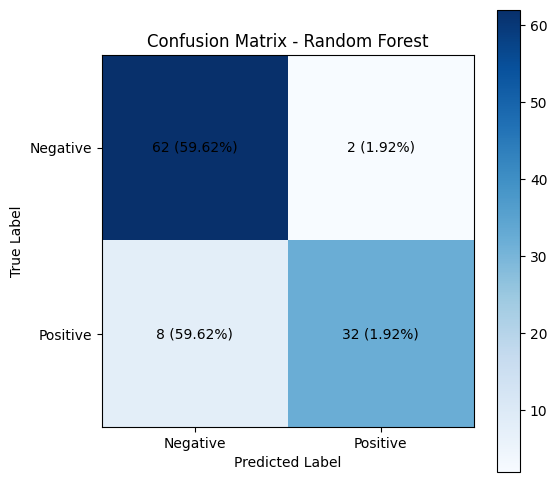

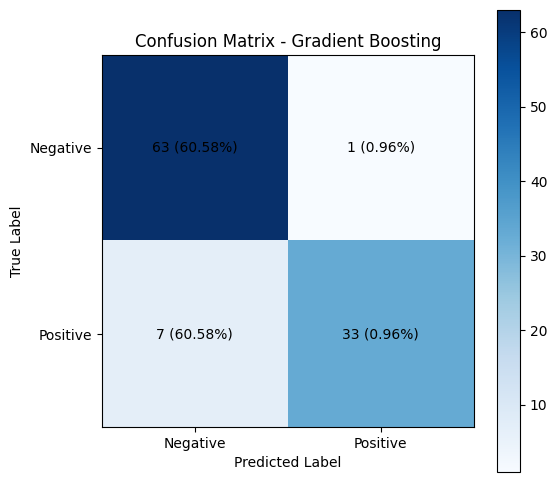

<Figure size 640x480 with 0 Axes>

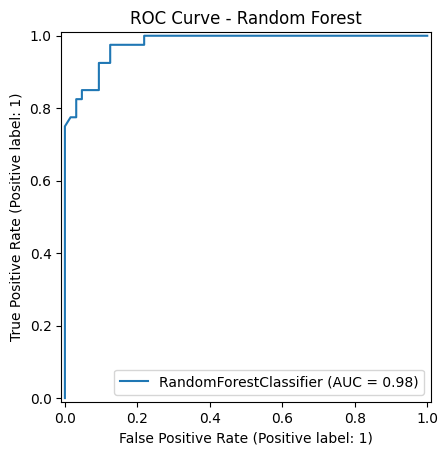

<Figure size 640x480 with 0 Axes>

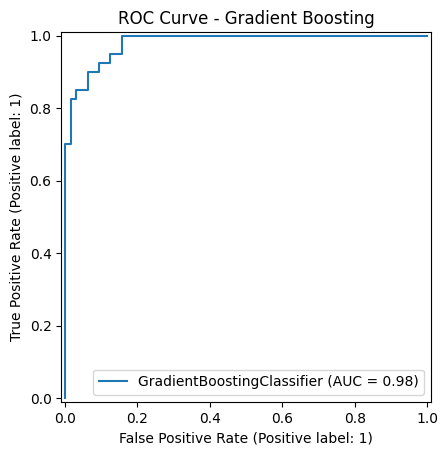

<Figure size 640x480 with 0 Axes>

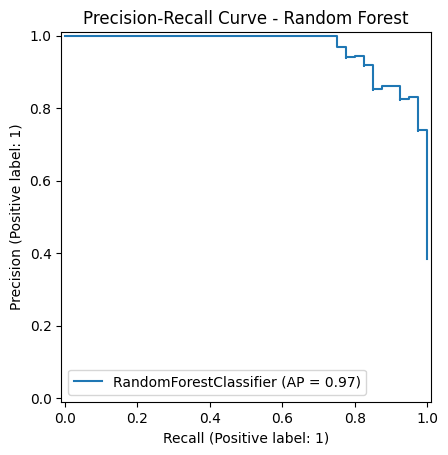

<Figure size 640x480 with 0 Axes>

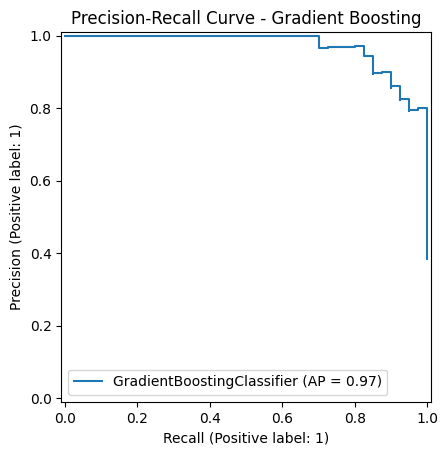

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, recall_score,
                             precision_score, f1_score, roc_auc_score,
                             confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay)


# Установка гиперпараметров для случайного леса
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Установка гиперпараметров для градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=192, learning_rate=0.0897, max_depth=2)
gb_model.fit(X_train, y_train)

# Функция для вычисления метрик
def calculate_metrics(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]

    accuracy = round(accuracy_score(y_valid, y_pred), 4)
    balanced_accuracy = round(balanced_accuracy_score(y_valid, y_pred), 4)
    recall = round(recall_score(y_valid, y_pred), 4)
    precision = round(precision_score(y_valid, y_pred), 4)
    f1 = round(f1_score(y_valid, y_pred), 4)

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
    specificity = round(tn / (tn + fp), 4) if (tn + fp) > 0 else 0 # Вычисление специфичности

    roc_auc = round(roc_auc_score(y_valid, y_pred_proba), 4)

    return [accuracy, balanced_accuracy, recall, precision, f1, specificity, roc_auc]

# Вычисление метрик для обеих моделей
rf_metrics = calculate_metrics(rf_model, X_test, y_test)
gb_metrics = calculate_metrics(gb_model, X_test, y_test)

# Создание DataFrame для метрик
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy', 'Recall', 'Precision', 'F1 Score', 'Specificity', 'ROC AUC'],
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics
})

# Вывод таблицы
print(metrics_df)

# Построение конфузионной матрицы для каждого классификатора
def plot_confusion_matrix(model, X_valid, y_valid, model_name):
    y_pred = model.predict(X_valid)
    cm = confusion_matrix(y_valid, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    thresholds = (cm.flatten()) / cm.sum()
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, f'{cm[i, j]} ({thresholds[j]*100:.2f}%)', ha='center', va='center')
    plt.show()

# Построение графиков
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(gb_model, X_test, y_test, "Gradient Boosting")

# ROC Curve
plt.figure()
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

plt.figure()
RocCurveDisplay.from_estimator(gb_model, X_test, y_test)
plt.title('ROC Curve - Gradient Boosting')
plt.show()

# Precision-Recall Curve
plt.figure()
PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

plt.figure()
PrecisionRecallDisplay.from_estimator(gb_model, X_test, y_test)
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.show()

Все метрики на модели градиентного бустинга с подобранными гиперпараметрами оказались выше по сравнению с моделью случайного леса, однако, они ниже, чем у модели логистической регрессии с подобранными гиперпараметрами.  
**ЗАКЛЮЧЕНИЕ**  
**Модель логистической регрессии на всех признаках показала наилучшие результаты классификации опухоли молочной железы по признаку доброкачественность - злокачественность.**